In [ ]:
# Code based on termpaper 2019 by Ashesh and Anders Høst

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path

In [38]:
data_dir = "../data/"
path_insertion = os.path.join(data_dir, "insertion_sort_n1024.pkl")
df_insertion = pd.read_pickle(path_insertion)
path_merge = os.path.join(data_dir, "merge_sort_n1024.pkl")
df_merge = pd.read_pickle(path_merge)

In [67]:
# Concat

frames = [df_insertion, df_merge]
df_all = pd.concat(frames, axis=0)

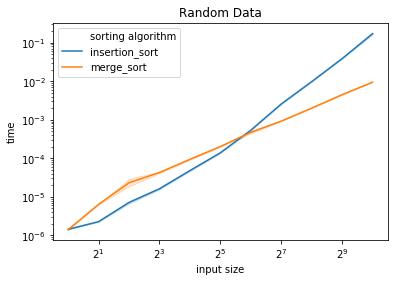

In [95]:
# Plot sorted

df_all_sorted = df_all[df_all["input order"] == "random"]
fig_sorted = sns.lineplot(x="input size", y='time', hue="sorting algorithm",
                          data=df_all_sorted)
plt.title("Random Data")
plt.xscale("log", basex=2)
plt.yscale("log")
fig_sorted = fig_sorted.get_figure()

In [64]:
# Get minimum times in separate frame
df_insertion_group = df_insertion.groupby(
    ["time"])
df_merge_group = df_merge.groupby(
    ["input order", "input size", "sorting algorithm", "time"])

In [65]:
df_insertion_group

In [66]:
df_insertion_group.min()

,input order,input size,run number,sorting algorithm
time,,,,
6.637762e-07,sorted,1,4,insertion_sort
6.679566e-07,sorted,1,3,insertion_sort
6.759254e-07,sorted,1,5,insertion_sort
6.770510e-07,sorted,1,2,insertion_sort
6.779452e-07,reversed,1,1,insertion_sort
...,...,...,...,...
1.614093e-01,random,1024,4,insertion_sort
1.627620e-01,random,1024,3,insertion_sort
1.646570e-01,random,1024,2,insertion_sort


In [27]:
# Concatenate

frames = [df_insertion_group, df_merge_group]
df_all = pd.concat(frames, axis=0)

In [28]:
df_all.groupby

run number      time
input order input size sorting algorithm                      
random      1          insertion_sort              1  0.000001
            2          insertion_sort              1  0.000002
            4          insertion_sort              1  0.000007
            8          insertion_sort              1  0.000015
            16         insertion_sort              1  0.000046
...                                              ...       ...
sorted      64         merge_sort                  1  0.000340
            128        merge_sort                  1  0.000721
            256        merge_sort                  1  0.001542
            512        merge_sort                  1  0.003376
            1024       merge_sort                  1  0.007071

[66 rows x 2 columns]